In [2]:
import sys
!{sys.executable} -m pip install pandas numpy seaborn matplotlib plotly sklearn

    100% |████████████████████████████████| 16.3MB 2.0MB/s ta 0:00:011   18% |██████                          | 3.0MB 4.7MB/s eta 0:00:03
    100% |████████████████████████████████| 215kB 720kB/s ta 0:00:01
    100% |████████████████████████████████| 35.7MB 738kB/s ta 0:00:011    44% |██████████████▏                 | 15.8MB 5.1MB/s eta 0:00:04    88% |████████████████████████████▍   | 31.7MB 1.5MB/s eta 0:00:03    91% |█████████████████████████████▏  | 32.5MB 1.4MB/s eta 0:00:03
  Running setup.py install for retrying ... done
  Running setup.py install for sklearn ... done


In [190]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA, FastICA
from sklearn import random_projection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

sns.set(rc={'figure.figsize':(8,8)})


In [152]:
all_stats = pd.read_csv("nba-player-stats-18-19.csv")
player_stats = all_stats[['Player','Pos','PTS', 'PF', 'BLK', 'STL', 'AST','TRB']]


In [153]:
stat_categories = ['PTS', 'BLK', 'STL', 'AST','TRB']
category_names = {
    'PTS': 'Points per game',
    'STL': 'Steals per game',
    'BLK': 'Blocks per game',
    'AST': 'Assists per game',
    'TRB': 'Total rebounds per game'
    
}

In [154]:
#Without feature scaling, e.g. a difference of 1 point scored is weighted the same as a difference in 1 rebound
kmeans = KMeans(n_clusters=5).fit(player_stats[stat_categories])
print(kmeans.cluster_centers_)

[[ 2.34322917  0.12760417  0.2484375   0.61822917  1.33854167]
 [10.5237037   0.45851852  0.82148148  2.53851852  4.14666667]
 [23.7027027   0.6972973   1.21891892  5.31081081  6.88918919]
 [15.55306122  0.66122449  0.90510204  2.73979592  6.53163265]
 [ 6.17431193  0.33440367  0.54266055  1.40321101  3.0766055 ]]


In [155]:
scaled_player_stats = preprocessing.scale(player_stats[stat_categories])

embedded = TSNE(n_components=2).fit_transform(scaled_player_stats)

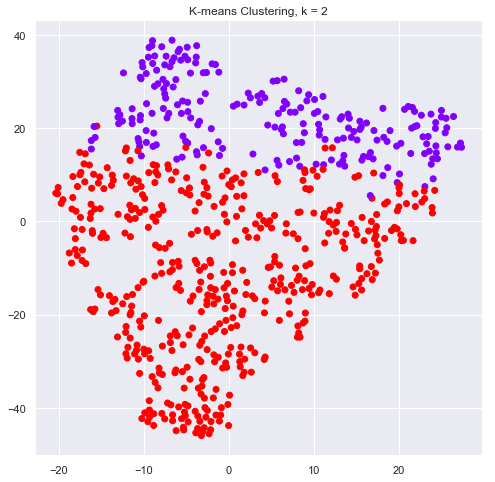

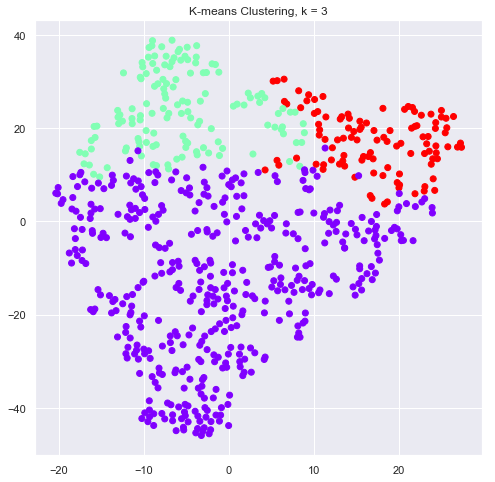

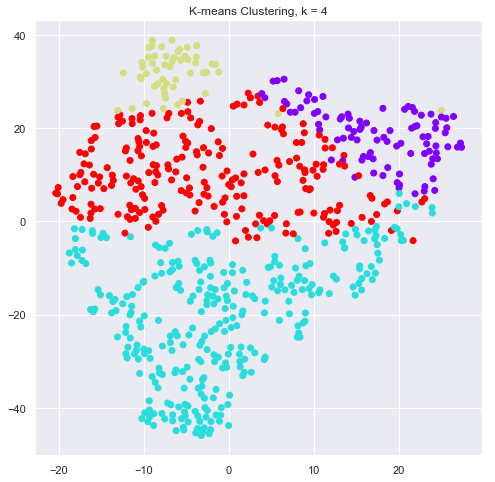

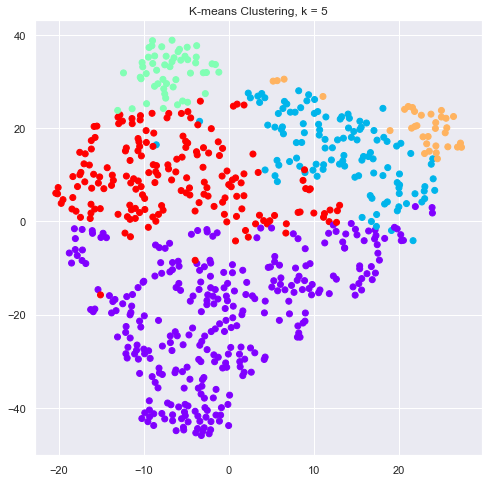

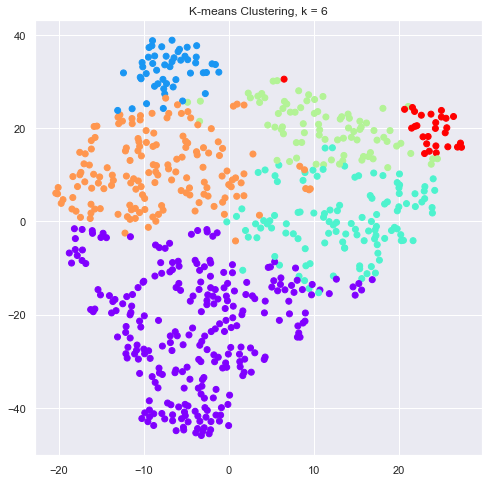

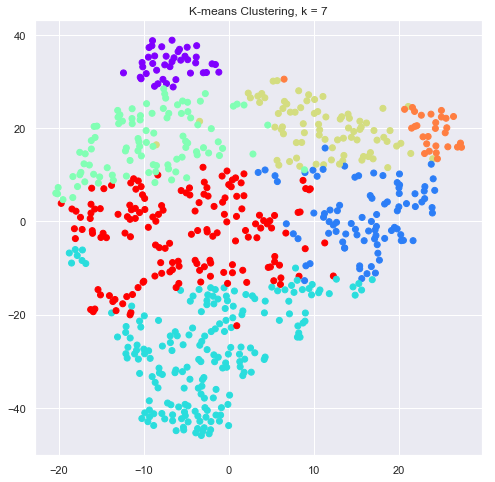

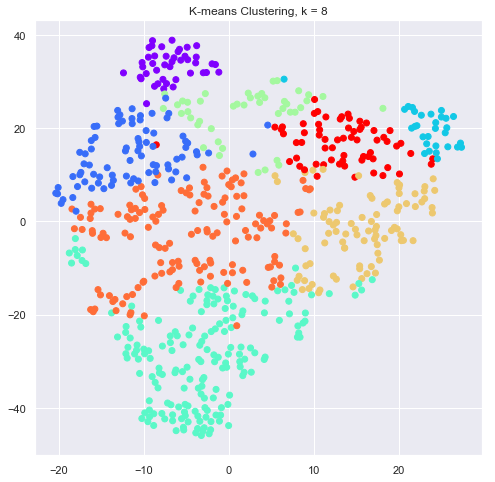

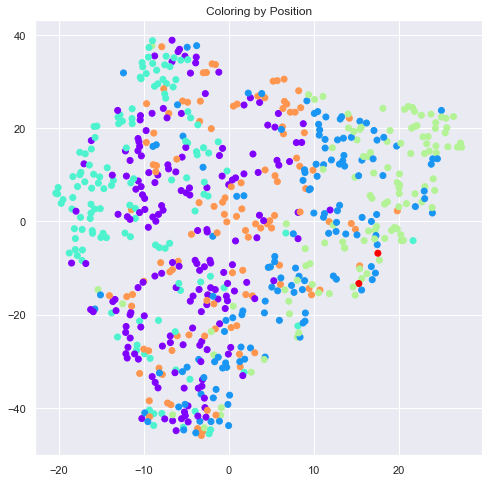

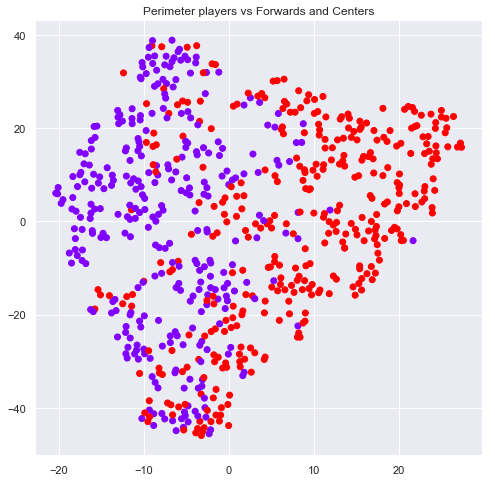

In [156]:
for k in range(2, 9):
    scaled_kmeans = KMeans(n_clusters=k).fit(scaled_player_stats)

    plt.scatter(embedded[:,0], embedded[:,1], c=scaled_kmeans.labels_, cmap='rainbow')
    plt.title("K-means Clustering, k = " + str(k))
    plt.show()

label_map = {}
position_coloring = []
next_value = 0

for position in player_stats['Pos'].tolist():
    if len(position) > 2:
        position = position[:2]
    if position not in label_map:
        label_map[position] = next_value
        next_value += 1
    position_coloring.append(label_map[position])

plt.scatter(embedded[:,0], embedded[:,1], c=position_coloring, cmap='rainbow')
plt.title("Coloring by Position")
plt.show()

another_position_coloring = []

for position in player_stats['Pos'].tolist():
    if 'G' in position:
        another_position_coloring.append(0)
    else:
        another_position_coloring.append(1)

plt.scatter(embedded[:,0], embedded[:,1], c=another_position_coloring, cmap='rainbow')
plt.title("Perimeter players vs Forwards and Centers")
plt.show()

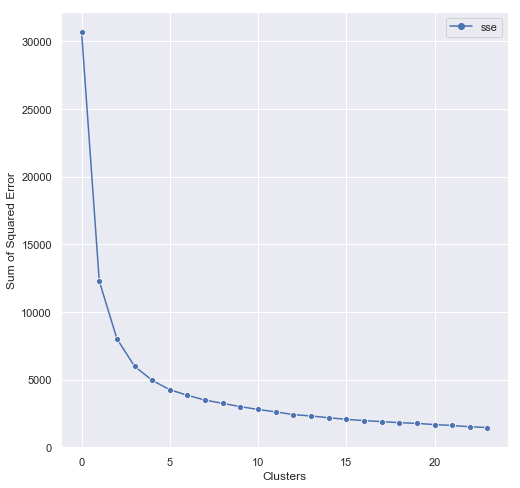

In [157]:
#different values of k
sse = []
for k in range(1,25):
    kmeans = KMeans(n_clusters=k).fit(player_stats[stat_categories])
#     embedded = TSNE(n_components=2).fit_transform(scaled_player_stats)
    sse.append(kmeans.inertia_)
    
sse_df = pd.DataFrame({'sse':sse})

sns.lineplot(data=sse_df, markers=True)
plt.xlabel('Clusters')
plt.ylabel('Sum of Squared Error')
plt.show()

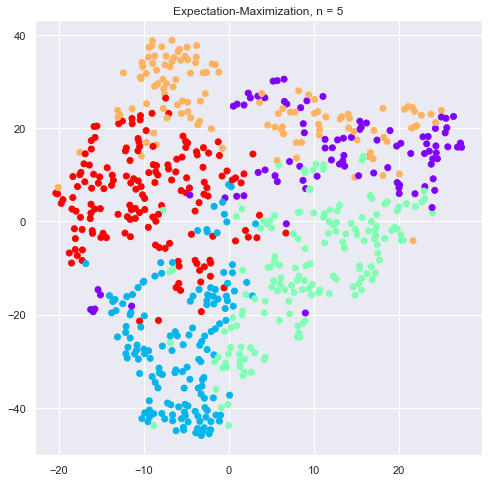

In [158]:
gmm = GaussianMixture(n_components=5).fit(player_stats[stat_categories])
labels = gmm.predict(player_stats[stat_categories])

plt.scatter(embedded[:,0], embedded[:,1], c=labels, cmap='rainbow')
plt.title('Expectation-Maximization, n = ' + str(5))
plt.show()

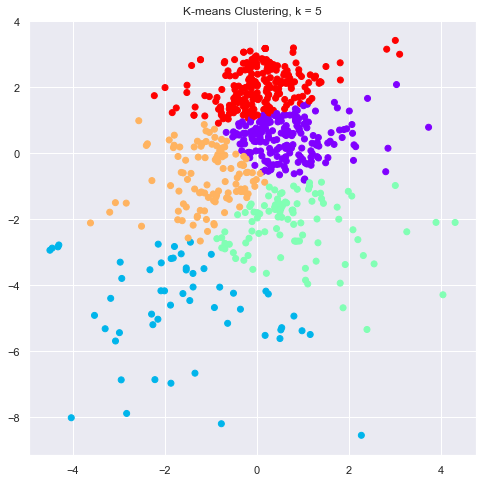

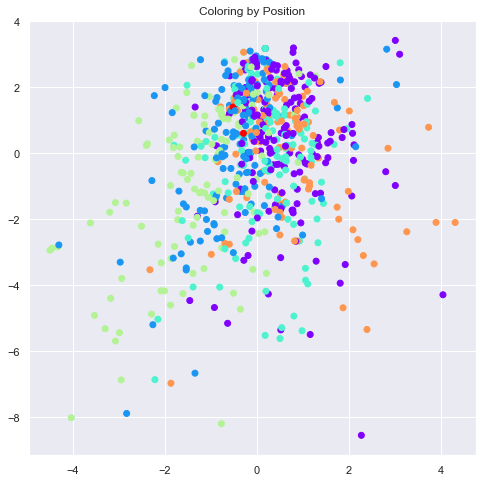

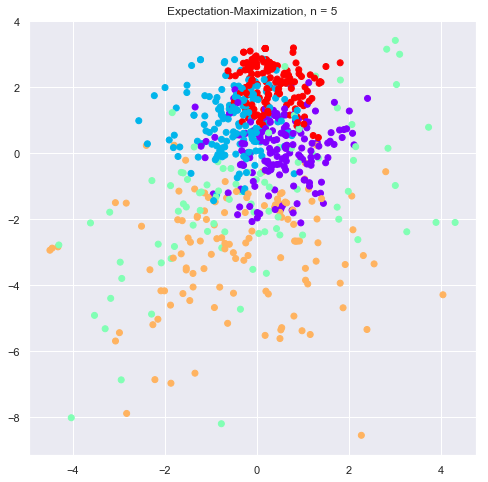

In [176]:
for k in range(5, 6):
    transformer = random_projection.GaussianRandomProjection(n_components=2)
    random_projectioned = transformer.fit_transform(scaled_player_stats)

    scaled_kmeans = KMeans(n_clusters=k).fit(random_projectioned)

    plt.scatter(random_projectioned[:,0], random_projectioned[:,1], c=scaled_kmeans.labels_, cmap='rainbow')
    plt.title("K-means Clustering, k = " + str(k))
    plt.show()
    
    position_coloring = []
    for position in player_stats['Pos'].tolist():
        if len(position) > 2:
            position = position[:2]
        if position not in label_map:
            label_map[position] = next_value
            next_value += 1
        position_coloring.append(label_map[position])

    plt.scatter(random_projectioned[:,0], random_projectioned[:,1], c=position_coloring, cmap='rainbow')
    plt.title("Coloring by Position")
    plt.show()
    
    gmm = GaussianMixture(n_components=k).fit(player_stats[stat_categories])
    
    labels = gmm.predict(player_stats[stat_categories])

    plt.scatter(random_projectioned[:,0], random_projectioned[:,1], c=labels, cmap='rainbow')
    plt.title('Expectation-Maximization, n = ' + str(5))
    plt.show()

[3.08833884 1.04903843]


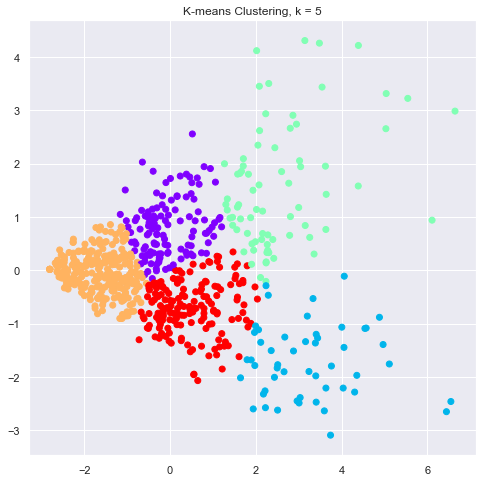

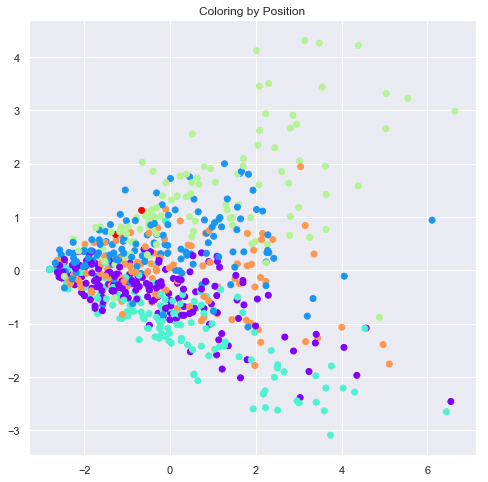

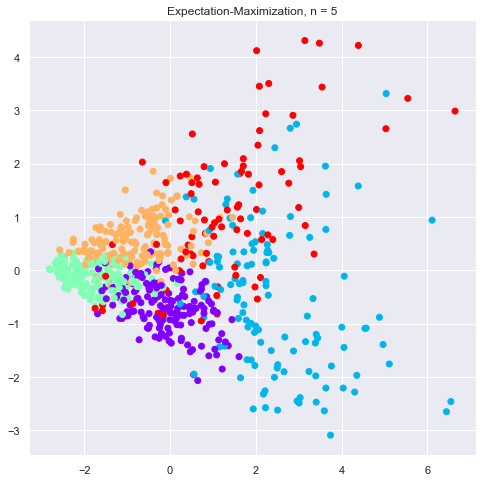

In [186]:

pca = PCA(n_components=2)
pca.fit(scaled_player_stats)
pcaed = pca.transform(scaled_player_stats)
scaled_kmeans = KMeans(n_clusters=5).fit(pcaed)
print(pca.explained_variance_)

plt.scatter(pcaed[:,0], pcaed[:,1], c=scaled_kmeans.labels_, cmap='rainbow')
plt.title("K-means Clustering, k = " + str(5))
plt.show()

position_coloring = []
for position in player_stats['Pos'].tolist():
    if len(position) > 2:
        position = position[:2]
    if position not in label_map:
        label_map[position] = next_value
        next_value += 1
    position_coloring.append(label_map[position])

plt.scatter(pcaed[:,0], pcaed[:,1], c=position_coloring, cmap='rainbow')
plt.title("Coloring by Position")
plt.show()

gmm = GaussianMixture(n_components=k).fit(player_stats[stat_categories])

labels = gmm.predict(player_stats[stat_categories])

plt.scatter(pcaed[:,0], pcaed[:,1], c=labels, cmap='rainbow')
plt.title('Expectation-Maximization, n = ' + str(5))
plt.show()

[3.08833884 1.04903843]


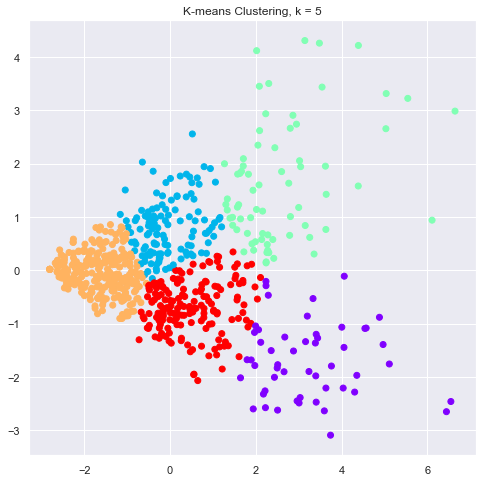

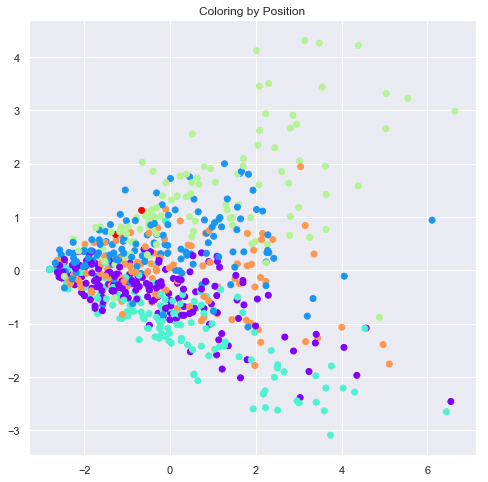

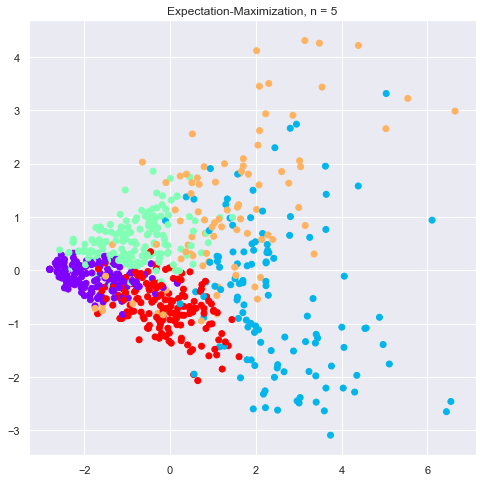

In [189]:

ica = FastICA(n_components=2, random_state=0)
ica.fit(scaled_player_stats)
icaed = pca.transform(scaled_player_stats)
scaled_kmeans = KMeans(n_clusters=5).fit(icaed)

plt.scatter(icaed[:,0], icaed[:,1], c=scaled_kmeans.labels_, cmap='rainbow')
plt.title("K-means Clustering, k = " + str(5))
plt.show()

position_coloring = []
for position in player_stats['Pos'].tolist():
    if len(position) > 2:
        position = position[:2]
    if position not in label_map:
        label_map[position] = next_value
        next_value += 1
    position_coloring.append(label_map[position])

plt.scatter(icaed[:,0], icaed[:,1], c=position_coloring, cmap='rainbow')
plt.title("Coloring by Position")
plt.show()

gmm = GaussianMixture(n_components=k).fit(player_stats[stat_categories])

labels = gmm.predict(player_stats[stat_categories])

plt.scatter(icaed[:,0], icaed[:,1], c=labels, cmap='rainbow')
plt.title('Expectation-Maximization, n = ' + str(5))
plt.show()
